<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1">Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Create-folders" data-toc-modified-id="Create-folders-1.1">Create folders</a></span></li><li><span><a href="#Preprocess-*.wav-files" data-toc-modified-id="Preprocess-*.wav-files-1.2">Preprocess *.wav files</a></span><ul class="toc-item"><li><span><a href="#Create-test-dataset" data-toc-modified-id="Create-test-dataset-1.2.1">Create test dataset</a></span></li><li><span><a href="#Create-train-dataset" data-toc-modified-id="Create-train-dataset-1.2.2">Create train dataset</a></span></li></ul></li><li><span><a href="#Test-results" data-toc-modified-id="Test-results-1.3">Test results</a></span></li></ul></li></ul></div>

# Preprocessing

* convert sounds to images by calculating [Mel Spectrogram](https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53)
* re-arange image files to the structure expected by [fast.ai ImageDataBunch.from_folder]( https://docs.fast.ai/vision.data.html#ImageDataBunch.from_folder):
    * train/
        * neutral/
        * calm/
        * happy/
        * ...
    * test/
        * neutral/
        * ...
    * valid/
        * neutral/
        * ...

In [1]:
import pandas as pd

meta_data = pd.read_csv('meta_data.csv')
meta_data.sample(5)

,emotion,intensity,statement,repetition,actor,actor_name,file_name
929,calm,normal,2,2,male,actor_24,data/Actor_24/03-01-02-01-02-02-24.wav
648,disgust,normal,2,1,male,actor_02,data/Actor_02/03-01-07-01-02-01-02.wav
394,fearful,strong,1,1,male,actor_10,data/Actor_10/03-01-06-02-01-01-10.wav
1102,disgust,normal,2,2,female,actor_13,data/Actor_13/03-01-07-01-02-02-13.wav
60,neutral,normal,2,2,female,actor_11,data/Actor_11/03-01-01-01-02-02-11.wav


## Create folders

In [30]:
import pathlib
import shutil

folder_prep_data = './data-preprocessed'
folder_data = './data'

def prepare_folders(root_folder, classes):
    """
    Create a folder structure required by fast.ia ImageDataBunch.from_folder
    function
    """
    data_path = pathlib.Path(root_folder)
    
    if data_path.exists():
        shutil.rmtree(data_path)

    # create folder for preprocessed data
    data_path.mkdir()
    
    for folder_type in ['train', 'test', 'valid']:
        new_folder = data_path / folder_type
        new_folder.mkdir()
    
        for class_ in classes:
            new_folder = data_path / folder_type / class_
            new_folder.mkdir()

In [22]:
# create folders for each class

prepare_folders(folder_prep_data, meta_data.emotion.unique())

## Preprocess *.wav files

In [25]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def preprocess_file(file_name) -> np.array:
    """Read a sound file and return Mel Spectrogram"""
    
    y, sr = librosa.load(file_name)
    y, _ = librosa.effects.trim(y)

    # compute a mel-scaled spectrogram
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)

    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    
    return mel_spect

In [27]:
from tqdm.notebook import tqdm
import librosa.display

def preprocess_files(meta_data, output_folder):

    with tqdm(total=meta_data.shape[0]) as pbar:
        for item in meta_data.itertuples():
            mel_spect = preprocess_file(item.file_name)

            librosa.display.specshow(mel_spect, fmax=20000);

            prep_file = item.file_name.split('/')[-1].strip('.wav')
            prep_file = f'{prep_file}.jpeg'    
            prep_file = f'{output_folder}/{item.emotion}/{prep_file}'

            plt.savefig(prep_file)
            
            pbar.update(1)

In [ ]:
# test/train split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(meta_data)

### Create test dataset

Preprocessing test data


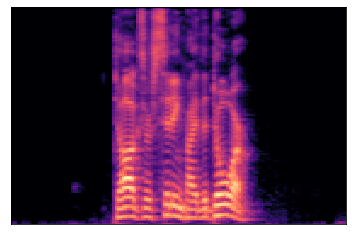

In [28]:
print('Preprocessing test data')
preprocess_files(test_data, f'{folder_prep_data}/test')

### Create train dataset

Preprocessing train data


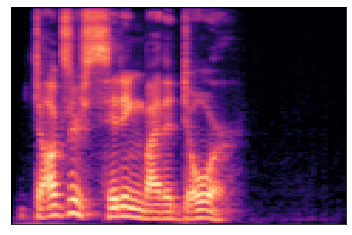

In [29]:
print('Preprocessing train data')
preprocess_files(train_data, f'{folder_prep_data}/train')

## Test results

In [36]:
!ls data-preprocessed/

test  train valid


In [37]:
!ls data-preprocessed/train

angry     calm      disgust   fearful   happy     neutral   sad       surprised


In [38]:
!ls data-preprocessed/train/calm/ | head

03-01-02-01-01-01-01.jpeg
03-01-02-01-01-01-03.jpeg
03-01-02-01-01-01-04.jpeg
03-01-02-01-01-01-05.jpeg
03-01-02-01-01-01-10.jpeg
03-01-02-01-01-01-11.jpeg
03-01-02-01-01-01-12.jpeg
03-01-02-01-01-01-13.jpeg
03-01-02-01-01-01-14.jpeg
03-01-02-01-01-01-16.jpeg


In [39]:
!ls data-preprocessed/test/calm/ | head

03-01-02-01-01-01-02.jpeg
03-01-02-01-01-01-06.jpeg
03-01-02-01-01-01-07.jpeg
03-01-02-01-01-01-08.jpeg
03-01-02-01-01-01-09.jpeg
03-01-02-01-01-01-15.jpeg
03-01-02-01-01-02-02.jpeg
03-01-02-01-01-02-03.jpeg
03-01-02-01-01-02-06.jpeg
03-01-02-01-01-02-07.jpeg


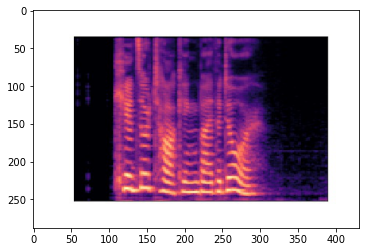

In [42]:
img = plt.imread('data-preprocessed/train/calm/03-01-02-01-01-01-12.jpeg')
plt.imshow(img);

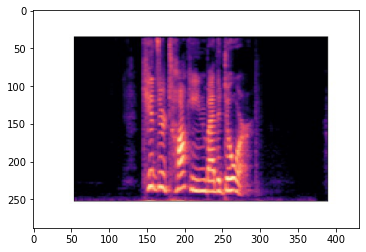

In [43]:
img = plt.imread('data-preprocessed/train/angry/03-01-05-01-01-01-08.jpeg')
plt.imshow(img);